# 1083 Albumin Initial ML

### By: Ian Weimer

In [72]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install imbalanced-learn

     |████████████████████████████████| 199 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 199 kB 21.6 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 18.3 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


## Imports

In [281]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import warnings
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import balanced_accuracy_score
import graphviz
import pydotplus
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [282]:
df = pd.read_csv('/Users/ianweimer/1083-albumin-data-exploration/ML/tables/albumin_cleaned_9.csv')

In [283]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [284]:
df.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    1                 1                   0            0.0    4   
2    0                 0                   0            1.0    3   
3    0                 0                   0            3.0    2   
4    1                 0                   0            0.0    4   

   bl_albumin_value  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0               2.9            0.0                0.0                 0.0   
1               3.1            0.0                0.0                 1.0   
2               2.2            0.0                0.0                 1.0   
3               1.5            0.0                0.0                 1.0   
4               3.5            1.0                0.0                 1.0   

   unknown_albumin_type  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                   1.0      1          0             1            0   
1                   0.0      0          1             0            0   
2                   0.0      0          1             0            0   
3                   0.0      0          1             0            0   
4                   0.0      1          0             1            0   

   30_day_mortality  30_day_readmission  SAPS  LOS_days  
0                 0                   0    34         2  
1                 0                   1    18         2  
2                 0                   0    29         2  
3                 0                   0    43         1  
4                 0                   1    34         2

In [285]:
df.shape

(61109, 18)

In [286]:
df.drop(columns=['30_day_readmission', 'LOS_days'], inplace=True)

In [287]:
#df.drop(columns=['5_percent_albumin'], inplace=True)

In [288]:
# remove ICU
# note: should remove from this analysis in earlier file
#df.drop(columns=['ICU'], inplace=True)

In [289]:
#df.drop(columns=['CCI'], inplace=True)

In [290]:
#df.drop(columns=['qSOFA'], inplace=True)

In [291]:
#df.drop(columns=['albumin'], inplace=True)

In [292]:
df.describe()

ICU  mass_transfusion  total_transfusions  anemia_status  \
count  61109.000000      61109.000000        61109.000000   61109.000000   
mean       0.210444          0.030307            0.581764       1.701795   
std        0.407627          0.171431            0.968769       1.116495   
min        0.000000          0.000000            0.000000       0.000000   
25%        0.000000          0.000000            0.000000       1.000000   
50%        0.000000          0.000000            0.000000       2.000000   
75%        0.000000          0.000000            1.000000       3.000000   
max        1.000000          1.000000            5.000000       3.000000   

                CCI  bl_albumin_value  albumin_24hrs  5_percent_albumin  \
count  61109.000000      61109.000000   61109.000000       61109.000000   
mean       3.979414          3.022666       0.084996           0.070579   
std        2.733080          0.699047       0.278878           0.256122   
min        0.000000          0.002700       0.000000           0.000000   
25%        2.000000          2.600000       0.000000           0.000000   
50%        4.000000          3.000000       0.000000           0.000000   
75%        6.000000          3.500000       0.000000           0.000000   
max       19.000000          6.300000       1.000000           1.000000   

       25_percent_albumin  unknown_albumin_type         qSOFA     Cirrhosis  \
count        61109.000000          61109.000000  61109.000000  61109.000000   
mean             0.116186              0.114140      0.504787      0.272857   
std              0.320450              0.317984      0.697482      0.445431   
min              0.000000              0.000000      0.000000      0.000000   
25%              0.000000              0.000000      0.000000      0.000000   
50%              0.000000              0.000000      0.000000      0.000000   
75%              0.000000              0.000000      1.000000      1.000000   
max              1.000000              1.000000      3.000000      1.000000   

       beta_blocker   hemorrhagic  30_day_mortality          SAPS  
count  61109.000000  61109.000000      61109.000000  61109.000000  
mean       0.336481      0.073950          0.085699     26.358818  
std        0.472509      0.261691          0.279922     11.067891  
min        0.000000      0.000000          0.000000      0.000000  
25%        0.000000      0.000000          0.000000     18.000000  
50%        0.000000      0.000000          0.000000     25.000000  
75%        1.000000      0.000000          0.000000     33.000000  
max        1.000000      1.000000          1.000000     64.000000

In [293]:
#df = df[['CCI', 'unknown_albumin_type', 'albumin_24hrs', '25_percent_albumin', 'LOS_days']]

## Modeling

In [294]:
# establish target feature, LOS_days, as y feature
y = df['30_day_mortality']
# drop target feature from features dataframe
X = df.drop(columns = ['30_day_mortality'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [295]:
cols

Index(['ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI',
       'bl_albumin_value', 'albumin_24hrs', '5_percent_albumin',
       '25_percent_albumin', 'unknown_albumin_type', 'qSOFA', 'Cirrhosis',
       'beta_blocker', 'hemorrhagic', 'SAPS'],
      dtype='object')

## Standardize Data

In [296]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [297]:
X.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    1                 1                   0            0.0    4   
2    0                 0                   0            1.0    3   
3    0                 0                   0            3.0    2   
4    1                 0                   0            0.0    4   

   bl_albumin_value  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0               2.9            0.0                0.0                 0.0   
1               3.1            0.0                0.0                 1.0   
2               2.2            0.0                0.0                 1.0   
3               1.5            0.0                0.0                 1.0   
4               3.5            1.0                0.0                 1.0   

   unknown_albumin_type  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  
0                   1.0      1          0             1            0    34  
1                   0.0      0          1             0            0    18  
2                   0.0      0          1             0            0    29  
3                   0.0      0          1             0            0    43  
4                   0.0      1          0             1            0    34

In [298]:
X.shape

(61109, 15)

## Train Test Split

In [301]:
sm = SMOTENC(random_state=42, categorical_features = [0, 1, 2, 3, 4, \
                                                     6, 7, 8, 9, 10, 11, 12, \
                                                     13, 14])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [302]:
y_train.value_counts()

0    44702
1    44702
Name: 30_day_mortality, dtype: int64

In [303]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

## Multinomial Logistic Regression

In [304]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(multi_class='multinomial')

Feature: ICU Score: 0.33995
Feature: mass_transfusion Score: -0.47272
Feature: total_transfusions Score: -0.13983
Feature: anemia_status Score: -0.09567
Feature: CCI Score: 0.06106
Feature: bl_albumin_value Score: -0.28895
Feature: albumin_24hrs Score: -0.18326
Feature: 5_percent_albumin Score: 0.15257
Feature: 25_percent_albumin Score: 0.36853
Feature: unknown_albumin_type Score: 0.44002
Feature: qSOFA Score: 0.15834
Feature: Cirrhosis Score: -0.00854
Feature: beta_blocker Score: -0.23071
Feature: hemorrhagic Score: 0.03398
Feature: SAPS Score: 0.01555


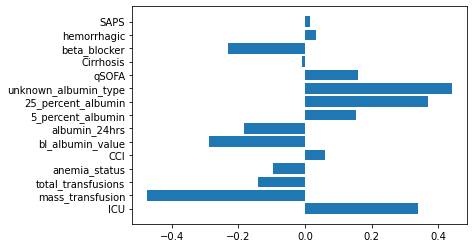

In [305]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

                      Importance
unknown_albumin_type    1.552733
25_percent_albumin      1.445609
ICU                     1.404872
qSOFA                   1.171559
5_percent_albumin       1.164829
CCI                     1.062968
hemorrhagic             1.034560
SAPS                    1.015672
Cirrhosis               0.991494
anemia_status           0.908768
total_transfusions      0.869506
albumin_24hrs           0.832549
beta_blocker            0.793966
bl_albumin_value        0.749048
mass_transfusion        0.623306


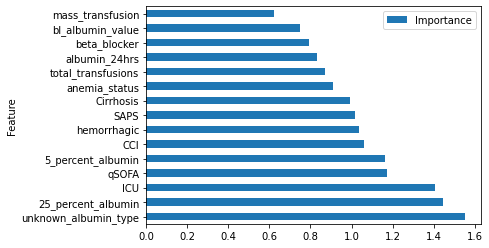

In [306]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [307]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [308]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[33129 11573]
 [13561 31141]]


In [309]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72     44702
           1       0.73      0.70      0.71     44702

    accuracy                           0.72     89404
   macro avg       0.72      0.72      0.72     89404
weighted avg       0.72      0.72      0.72     89404



In [310]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[8250 2920]
 [ 318  734]]


In [311]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84     11170
           1       0.20      0.70      0.31      1052

    accuracy                           0.74     12222
   macro avg       0.58      0.72      0.57     12222
weighted avg       0.90      0.74      0.79     12222



## 1: Decision Tree (Max Depth=3)

In [312]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=3)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Feature: ICU Score: 0.00000
Feature: mass_transfusion Score: 0.00000
Feature: total_transfusions Score: 0.01156
Feature: anemia_status Score: 0.00000
Feature: CCI Score: 0.00000
Feature: bl_albumin_value Score: 0.43295
Feature: albumin_24hrs Score: 0.00000
Feature: 5_percent_albumin Score: 0.00000
Feature: 25_percent_albumin Score: 0.04591
Feature: unknown_albumin_type Score: 0.28236
Feature: qSOFA Score: 0.13866
Feature: Cirrhosis Score: 0.00000
Feature: beta_blocker Score: 0.00000
Feature: hemorrhagic Score: 0.00000
Feature: SAPS Score: 0.08857


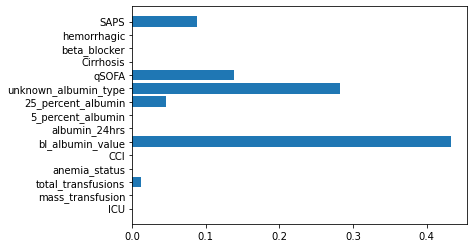

In [313]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [314]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [315]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[32964 11738]
 [17024 27678]]


In [316]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70     44702
           1       0.70      0.62      0.66     44702

    accuracy                           0.68     89404
   macro avg       0.68      0.68      0.68     89404
weighted avg       0.68      0.68      0.68     89404



In [317]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[8241 2929]
 [ 433  619]]


In [318]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83     11170
           1       0.17      0.59      0.27      1052

    accuracy                           0.72     12222
   macro avg       0.56      0.66      0.55     12222
weighted avg       0.88      0.72      0.78     12222



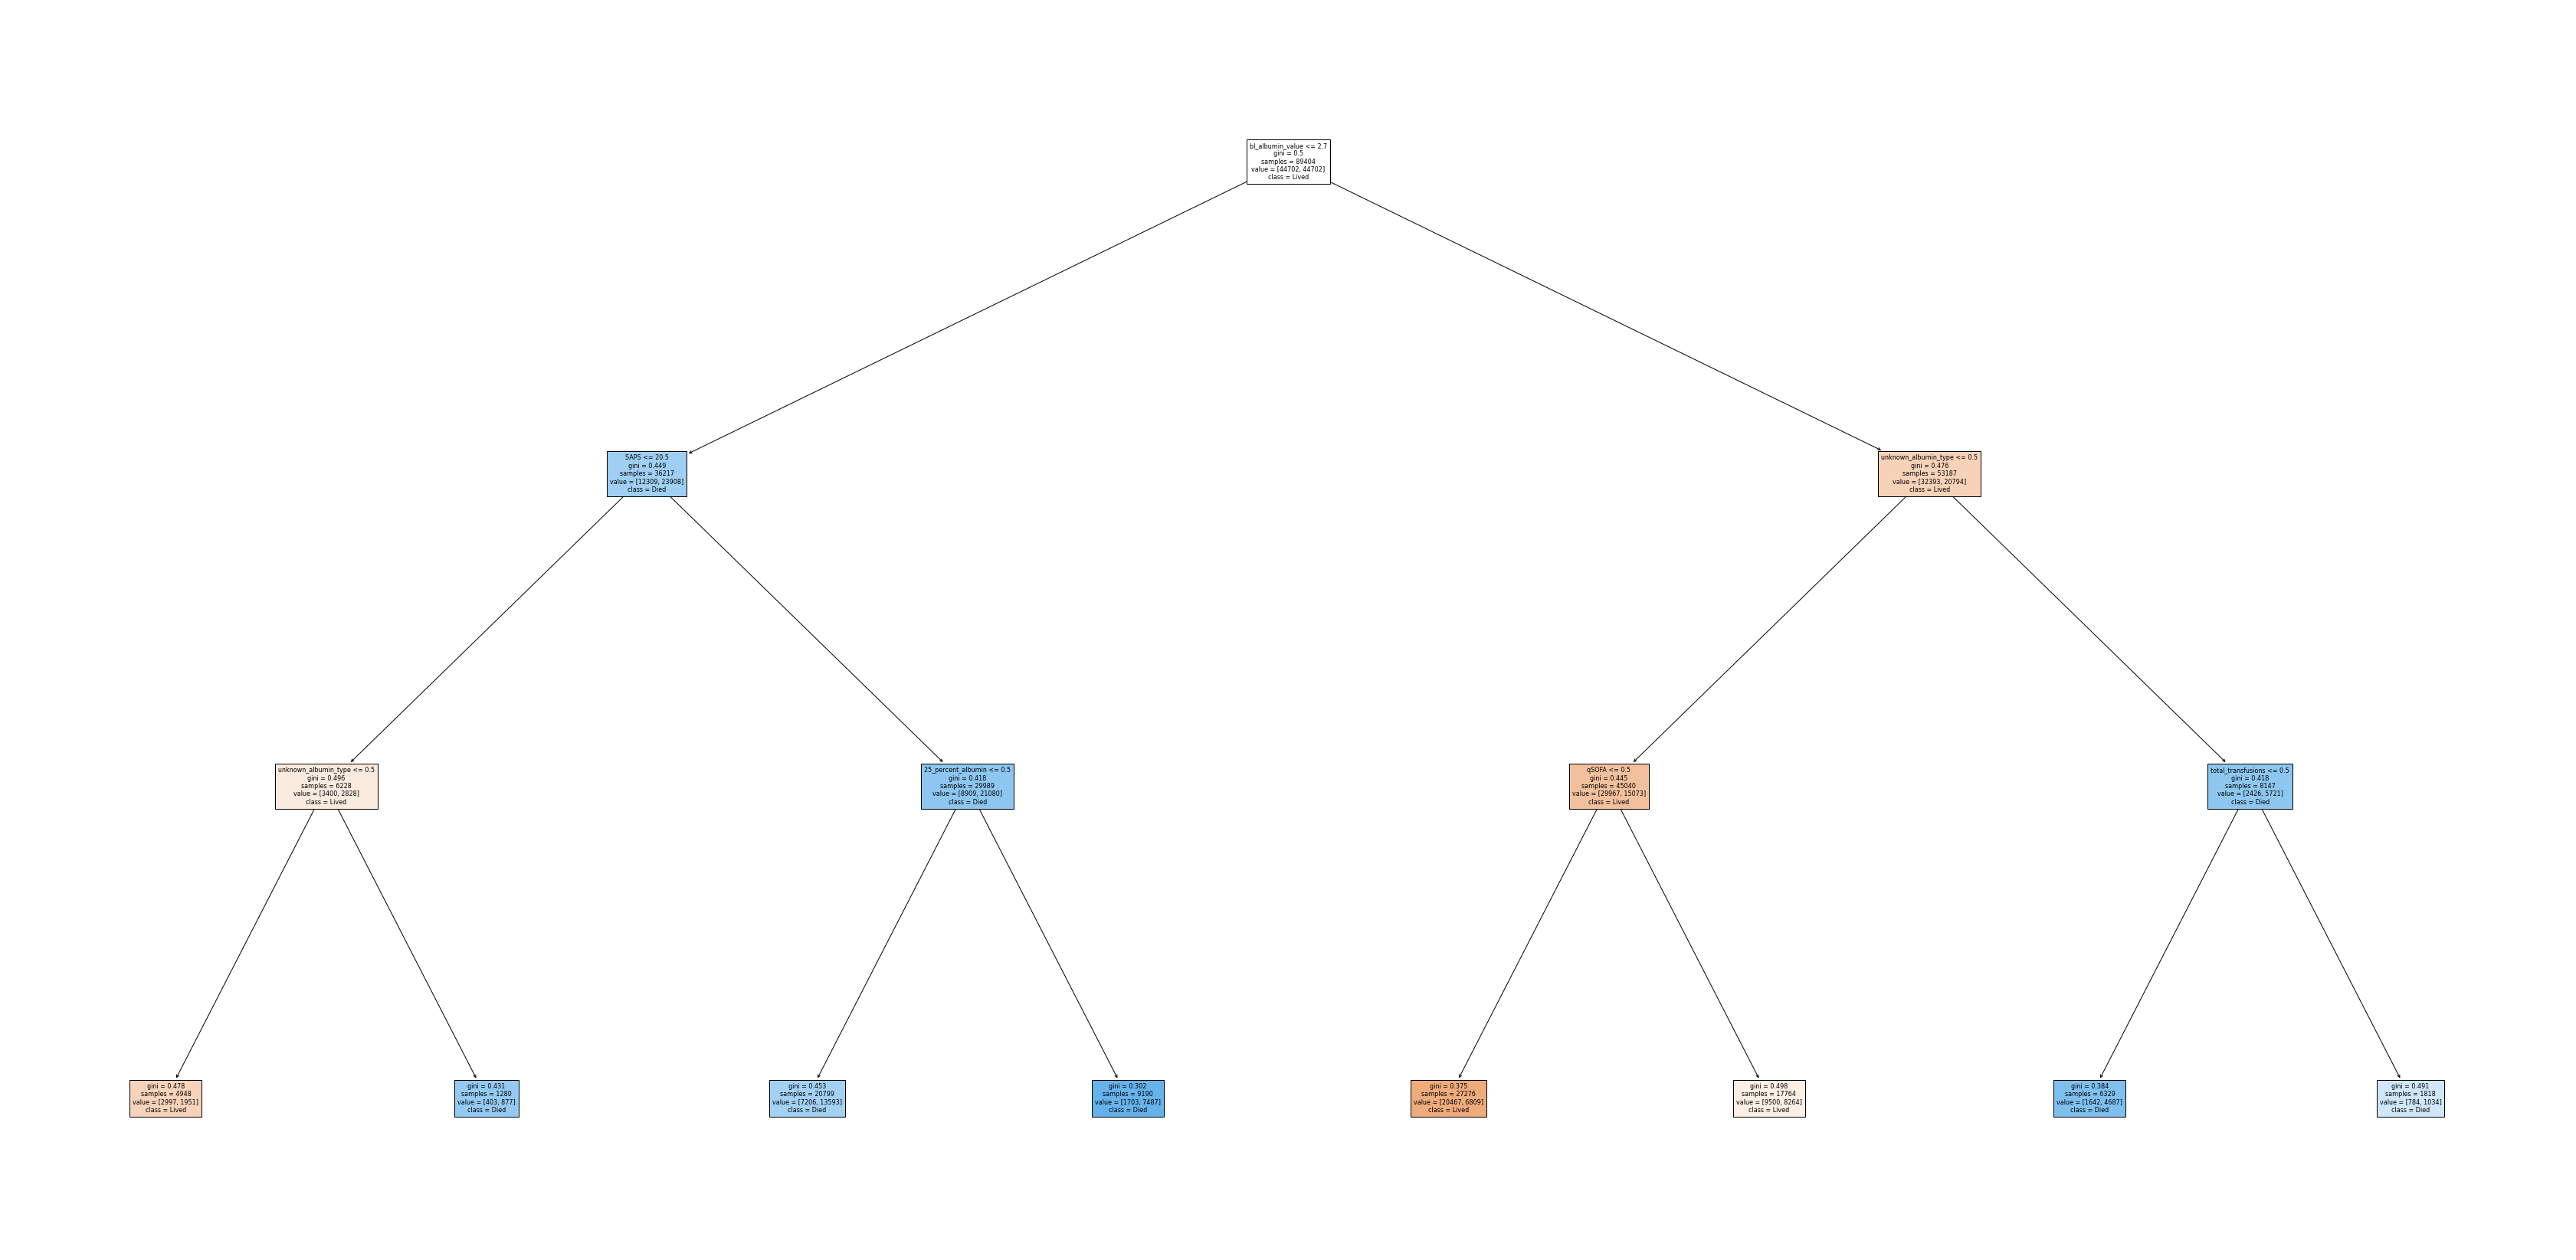

In [319]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [320]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('30DM_DT_D3.png')

True

## 2: Decision Tree (Max Depth=4)

In [321]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=4)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Feature: ICU Score: 0.03377
Feature: mass_transfusion Score: 0.00000
Feature: total_transfusions Score: 0.00971
Feature: anemia_status Score: 0.00768
Feature: CCI Score: 0.06741
Feature: bl_albumin_value Score: 0.40159
Feature: albumin_24hrs Score: 0.00000
Feature: 5_percent_albumin Score: 0.00000
Feature: 25_percent_albumin Score: 0.03854
Feature: unknown_albumin_type Score: 0.23704
Feature: qSOFA Score: 0.11640
Feature: Cirrhosis Score: 0.00000
Feature: beta_blocker Score: 0.01352
Feature: hemorrhagic Score: 0.00000
Feature: SAPS Score: 0.07435


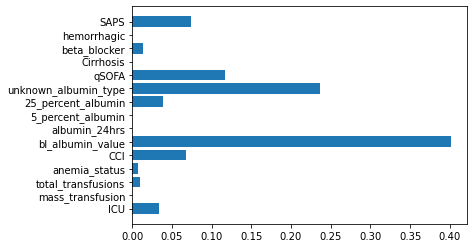

In [322]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [323]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [324]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[31146 13556]
 [13812 30890]]


In [325]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69     44702
           1       0.70      0.69      0.69     44702

    accuracy                           0.69     89404
   macro avg       0.69      0.69      0.69     89404
weighted avg       0.69      0.69      0.69     89404



In [326]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[7747 3423]
 [ 382  670]]


In [327]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     11170
           1       0.16      0.64      0.26      1052

    accuracy                           0.69     12222
   macro avg       0.56      0.67      0.53     12222
weighted avg       0.89      0.69      0.76     12222



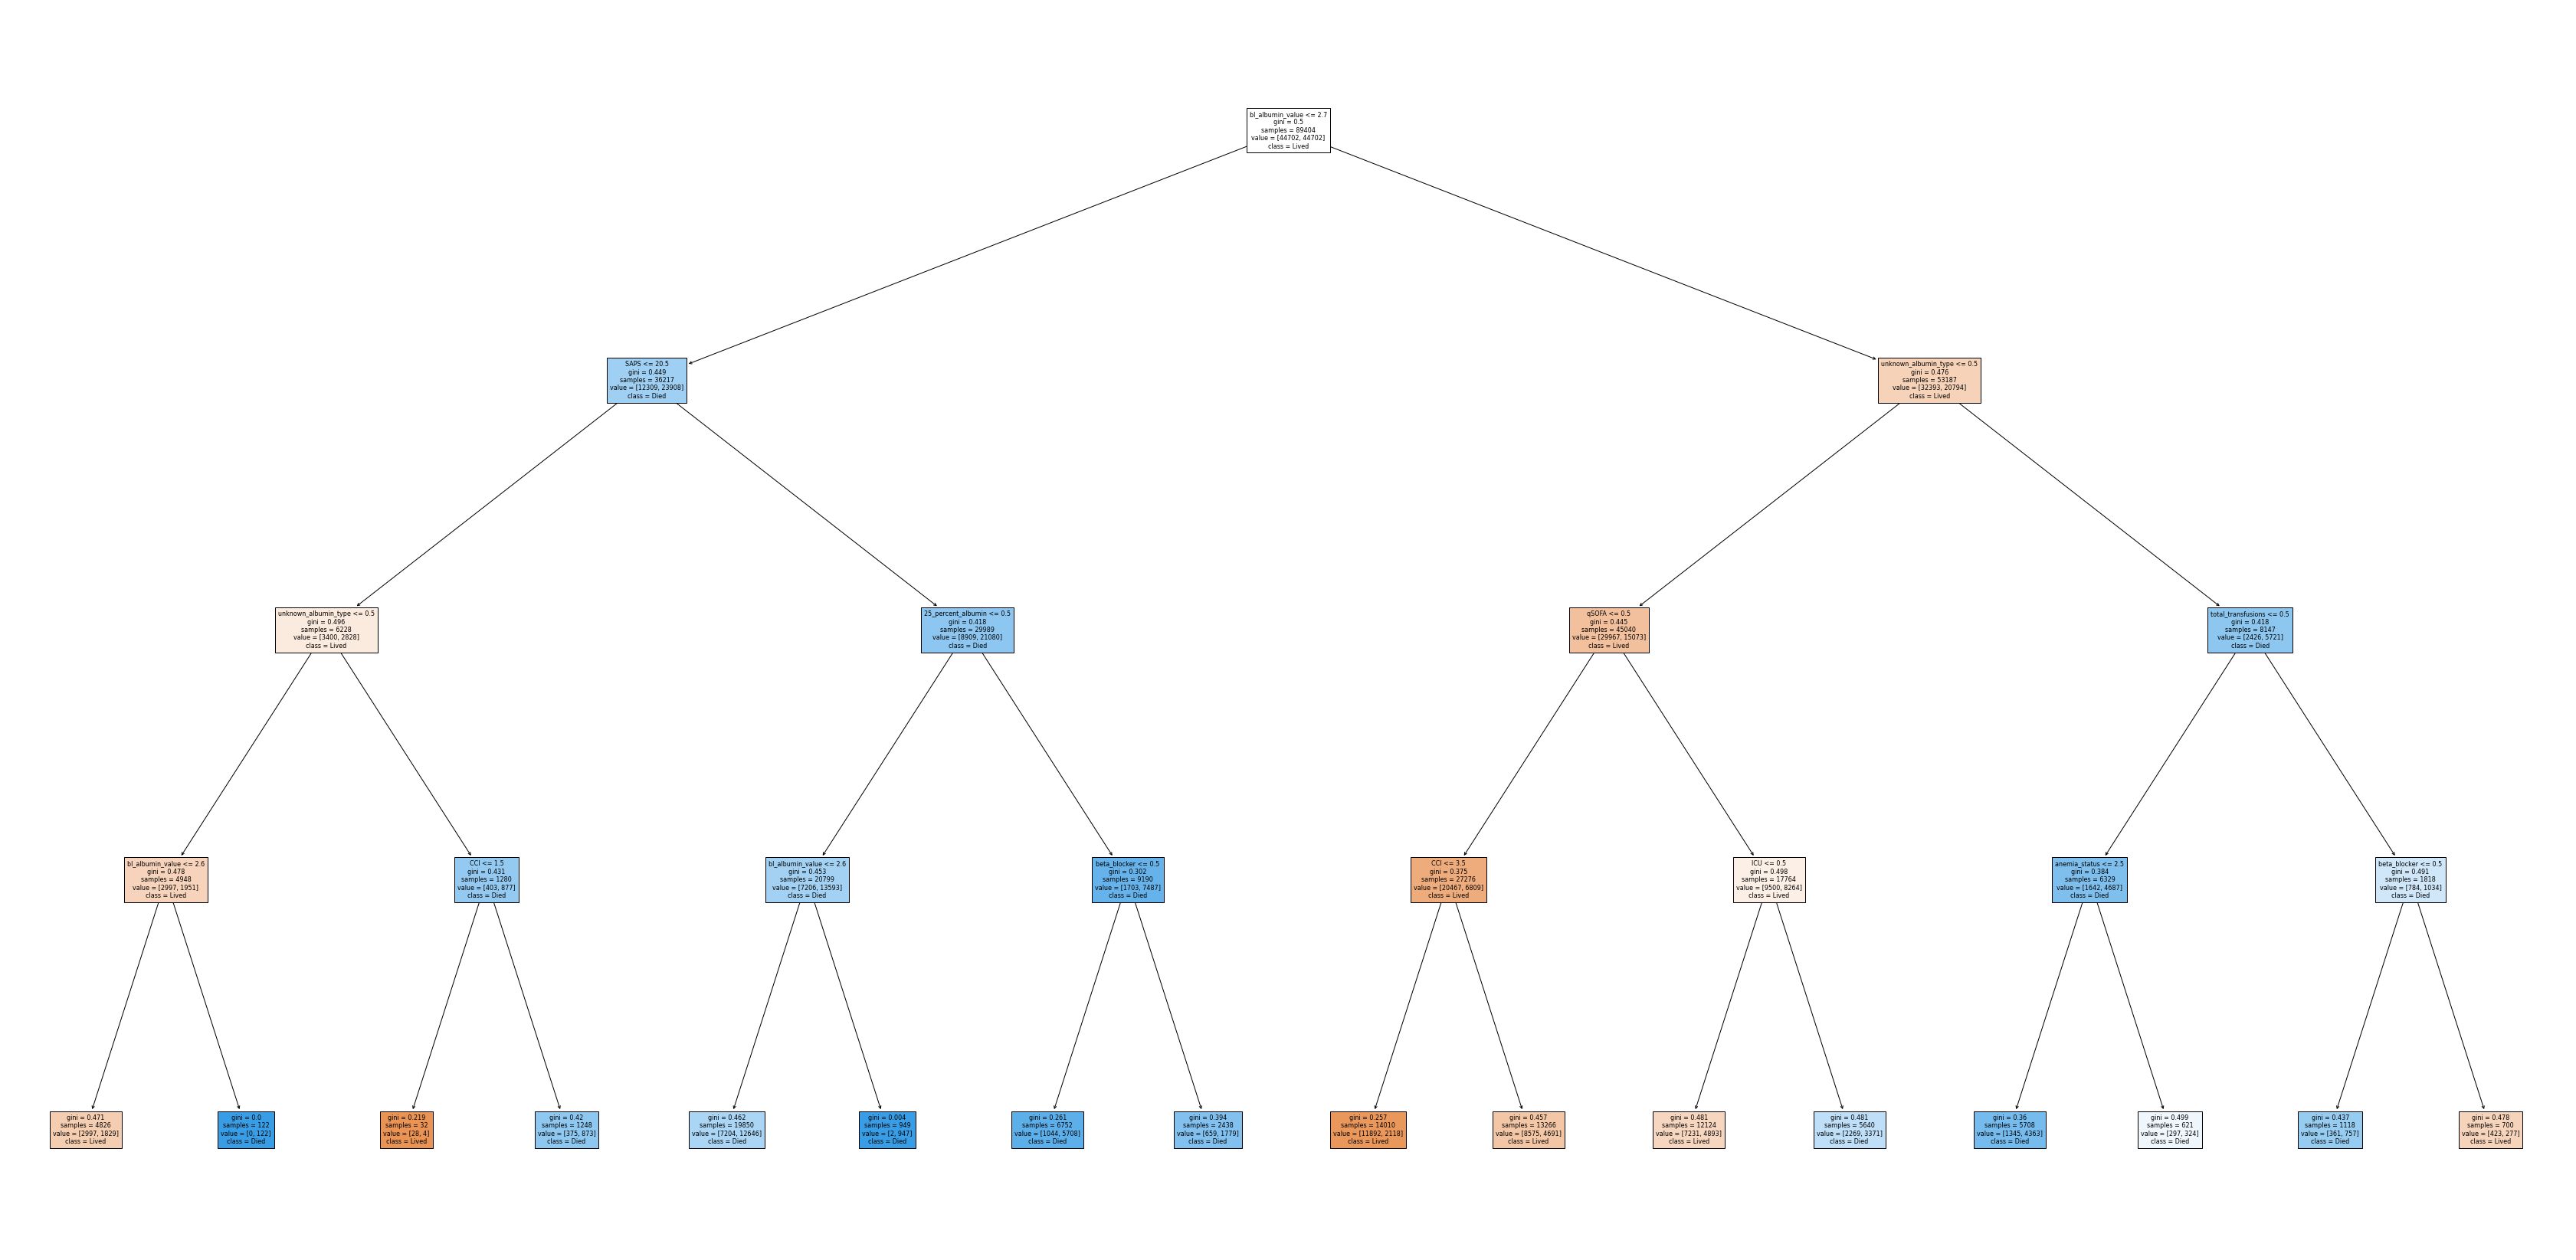

In [328]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [329]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('30DM_DT_D4.png')

True

## 3: Decision Tree 

In [330]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=5)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

Feature: ICU Score: 0.05602
Feature: mass_transfusion Score: 0.00000
Feature: total_transfusions Score: 0.01049
Feature: anemia_status Score: 0.00894
Feature: CCI Score: 0.07502
Feature: bl_albumin_value Score: 0.40655
Feature: albumin_24hrs Score: 0.00270
Feature: 5_percent_albumin Score: 0.00000
Feature: 25_percent_albumin Score: 0.03323
Feature: unknown_albumin_type Score: 0.20443
Feature: qSOFA Score: 0.10039
Feature: Cirrhosis Score: 0.00000
Feature: beta_blocker Score: 0.01166
Feature: hemorrhagic Score: 0.00000
Feature: SAPS Score: 0.09058


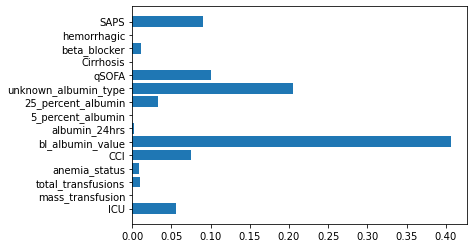

In [331]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [332]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [333]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[32007 12695]
 [13329 31373]]


In [334]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71     44702
           1       0.71      0.70      0.71     44702

    accuracy                           0.71     89404
   macro avg       0.71      0.71      0.71     89404
weighted avg       0.71      0.71      0.71     89404



In [335]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[7967 3203]
 [ 391  661]]


In [336]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.95      0.71      0.82     11170
           1       0.17      0.63      0.27      1052

    accuracy                           0.71     12222
   macro avg       0.56      0.67      0.54     12222
weighted avg       0.89      0.71      0.77     12222



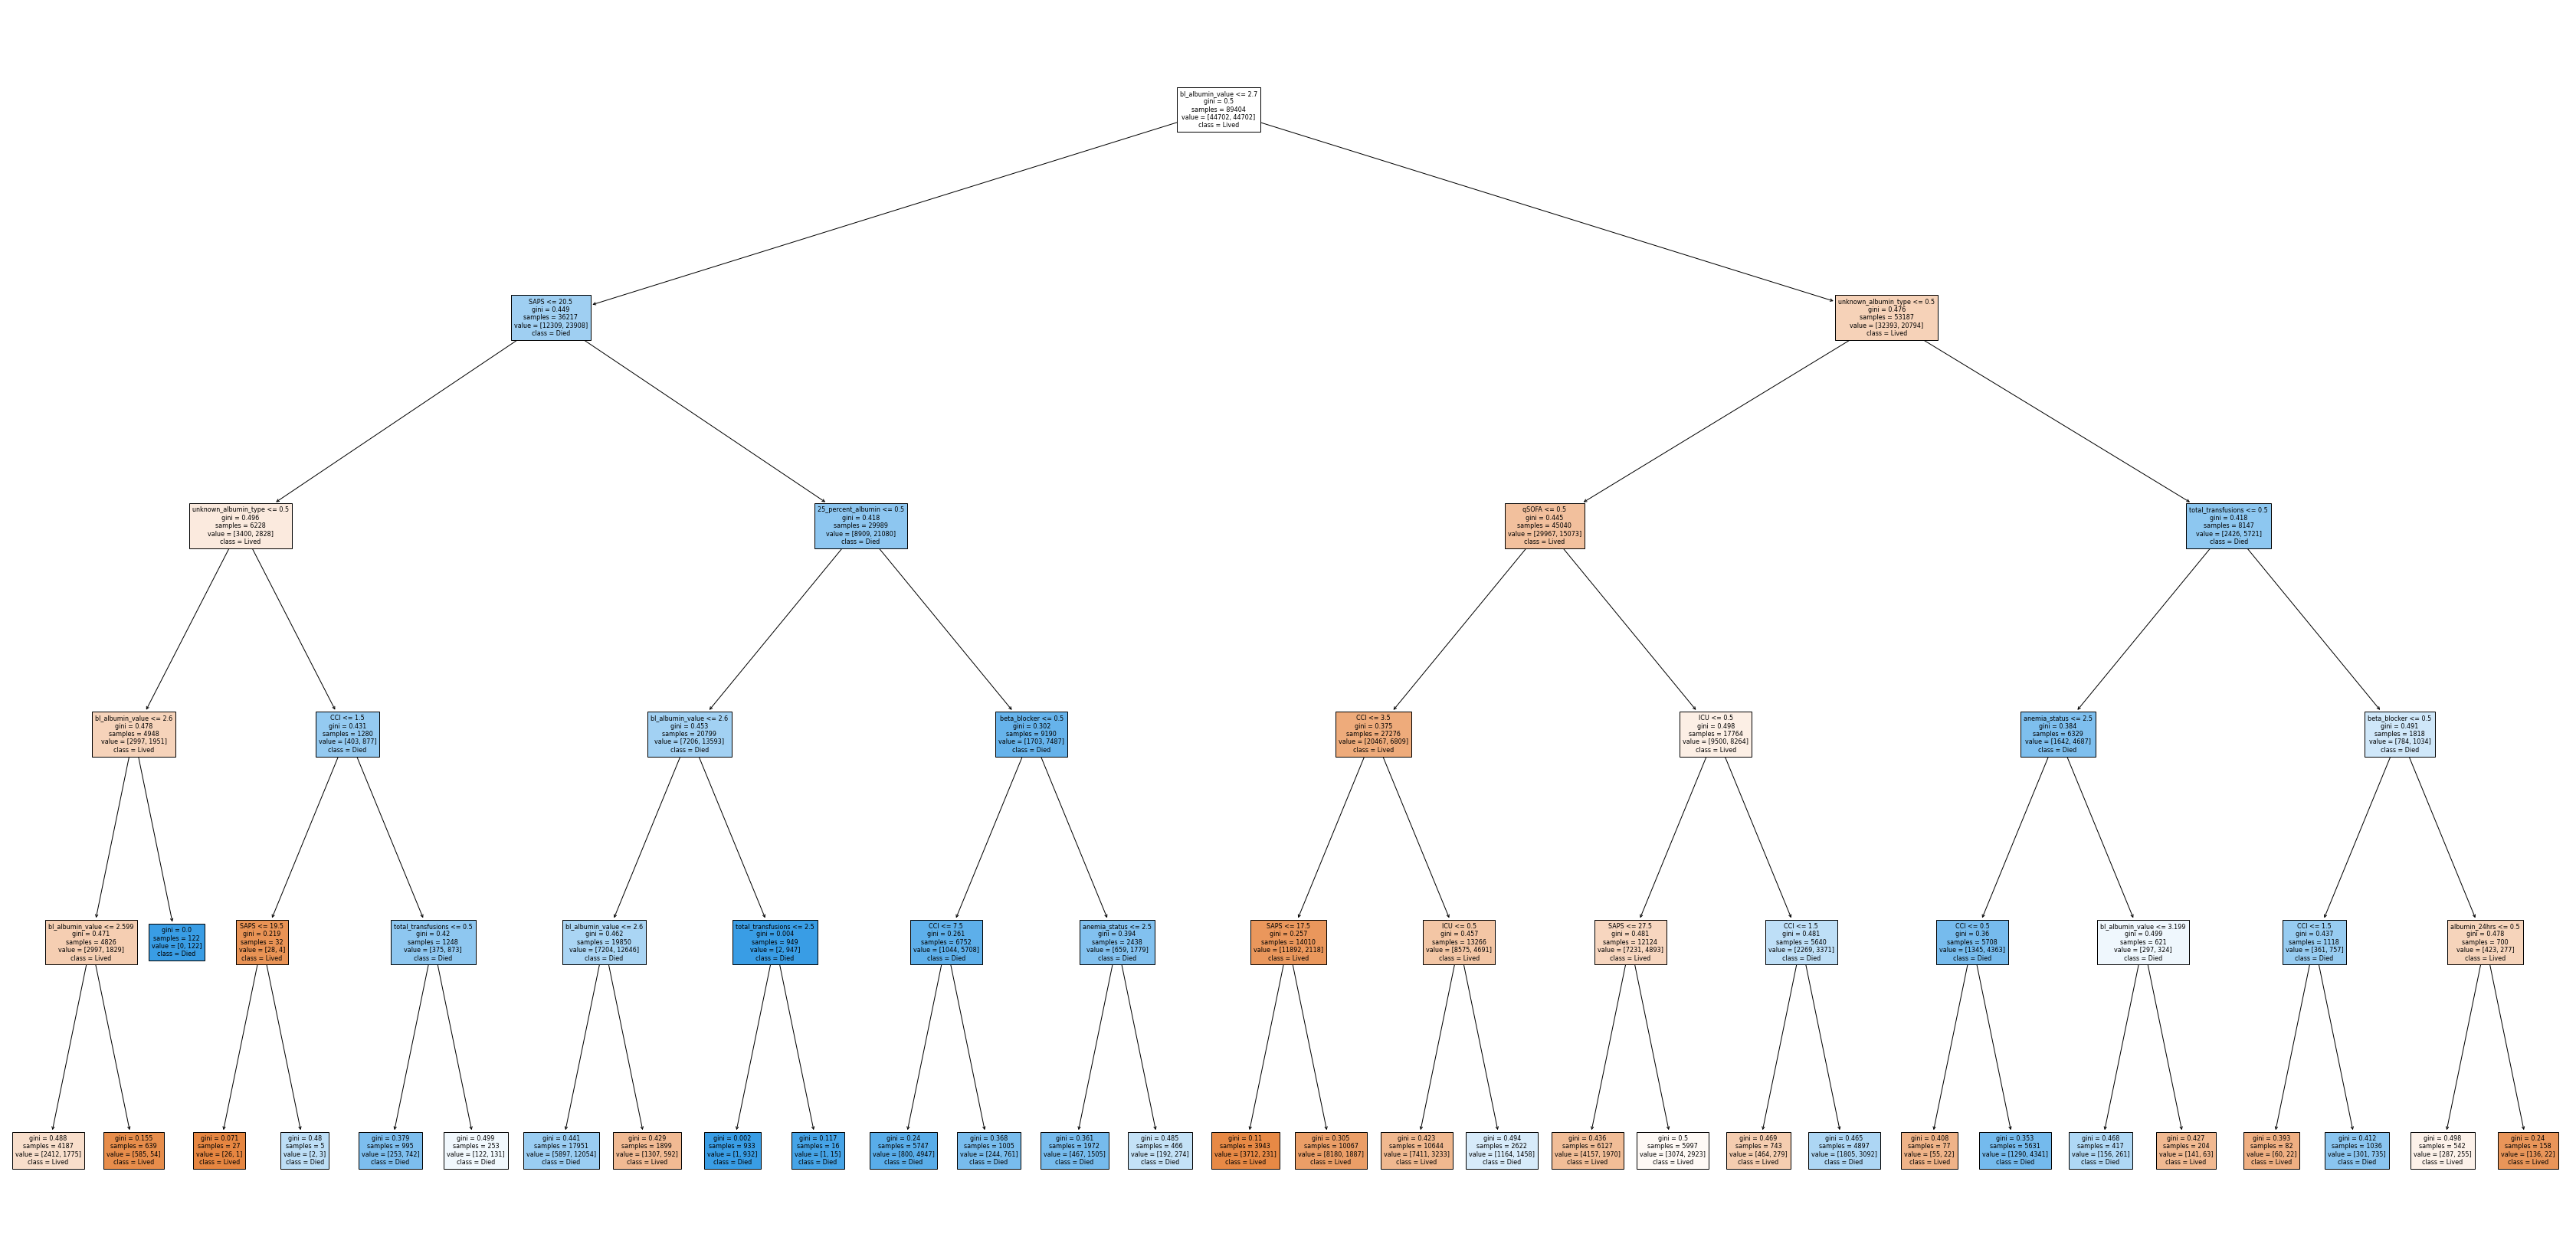

In [337]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [338]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('30DM_DT_D5.png')

True

## Optimized Model Using Grid Search

In [339]:
# instantiate a decision tree model
dt = tree.DecisionTreeClassifier()
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [340]:
# use grid search to select best parameters
# optimizing for accuracy

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

grid_cv = GridSearchCV(dt, param_grid, scoring="accuracy", n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)

Param for GS {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.85388822014625


In [341]:
# instantiate a decision tree model
dt = tree.DecisionTreeClassifier(max_depth=None, min_samples_leaf= 1, min_samples_split=2)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Feature: ICU Score: 0.02977
Feature: mass_transfusion Score: 0.00597
Feature: total_transfusions Score: 0.04205
Feature: anemia_status Score: 0.05742
Feature: CCI Score: 0.11573
Feature: bl_albumin_value Score: 0.35731
Feature: albumin_24hrs Score: 0.01283
Feature: 5_percent_albumin Score: 0.01321
Feature: 25_percent_albumin Score: 0.02149
Feature: unknown_albumin_type Score: 0.05166
Feature: qSOFA Score: 0.05589
Feature: Cirrhosis Score: 0.02708
Feature: beta_blocker Score: 0.02679
Feature: hemorrhagic Score: 0.01660
Feature: SAPS Score: 0.16621


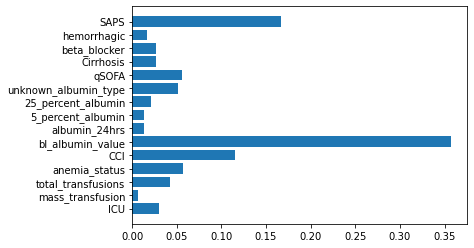

In [342]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [343]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [344]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[44595   107]
 [  143 44559]]


In [345]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44702
           1       1.00      1.00      1.00     44702

    accuracy                           1.00     89404
   macro avg       1.00      1.00      1.00     89404
weighted avg       1.00      1.00      1.00     89404



In [346]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[9570 1600]
 [ 745  307]]


In [347]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     11170
           1       0.16      0.29      0.21      1052

    accuracy                           0.81     12222
   macro avg       0.54      0.57      0.55     12222
weighted avg       0.86      0.81      0.83     12222



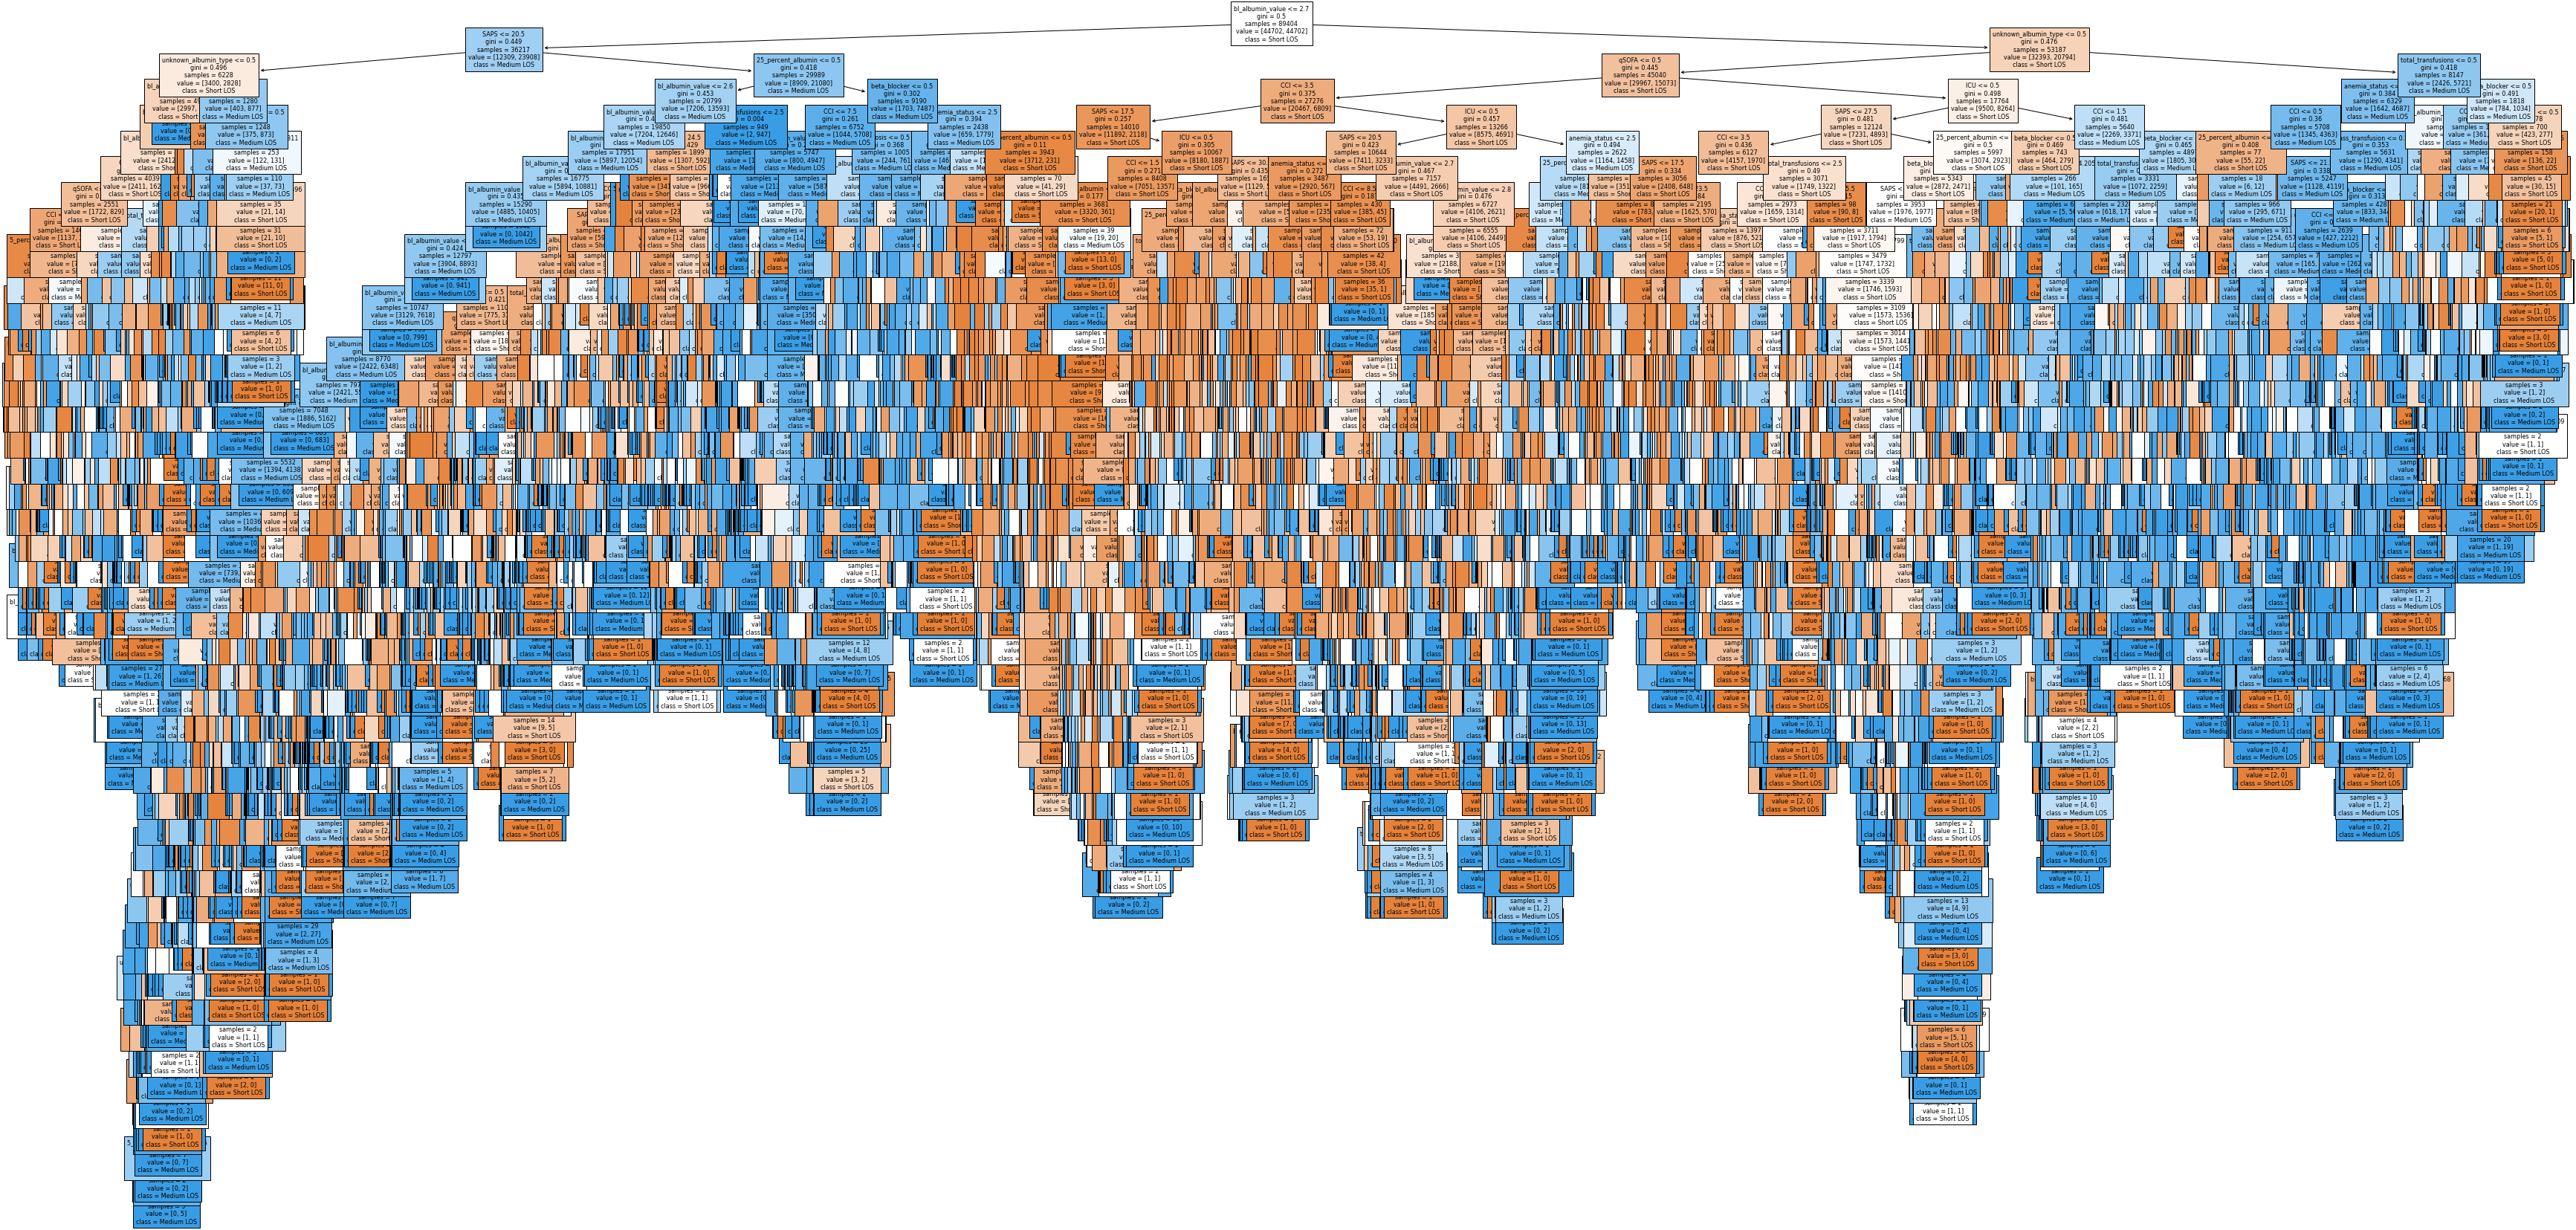

In [348]:
feature_names = X_train.columns.tolist()
class_names = ['Short LOS', 'Medium LOS', 'Long LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [349]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('Optimized_30DM_DT.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0581091 to fit



True

In [350]:
X_train['albumin_24hrs'].value_counts()

0.0    77565
1.0    11839
Name: albumin_24hrs, dtype: int64